In [1]:
import pandas as pd
import numpy as np
import os

df_path = os.path.join(os.getcwd(), '..', 'data', 'ds_salaries.csv')

df = pd.read_csv(df_path, index_col=0)

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# Data Preprocessing

In [2]:
from cleaning.preprocessor import Preprocessor
pp = Preprocessor()
pp_df = pp.fit_preprocess(df)
pp_df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Country Name_x,Country Name_y
0,2020,MI,FT,Data Scientist,79833,DE,On-Site,DE,L,Germany,Germany
1,2020,SE,FT,Machine Learning Scientist,260000,JP,On-Site,JP,S,Japan,Japan
2,2020,SE,FT,Big Data Engineer,109024,GB,Hybrid,GB,M,United Kingdom of Great Britain and Northern I...,United Kingdom of Great Britain and Northern I...
3,2020,MI,FT,Product Data Analyst,20000,HN,On-Site,HN,S,Honduras,Honduras
4,2020,SE,FT,Machine Learning Engineer,150000,US,Hybrid,US,L,United States of America (the),United States of America (the)
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,Remote,US,M,United States of America (the),United States of America (the)
603,2022,SE,FT,Data Engineer,126000,US,Remote,US,M,United States of America (the),United States of America (the)
604,2022,SE,FT,Data Analyst,129000,US,On-Site,US,M,United States of America (the),United States of America (the)
605,2022,SE,FT,Data Analyst,150000,US,Remote,US,M,United States of America (the),United States of America (the)


# Data Analysis

## Markov Analysis

In [3]:
analysis_df = pp_df.copy()
analysis_df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Country Name_x,Country Name_y
0,2020,MI,FT,Data Scientist,79833,DE,On-Site,DE,L,Germany,Germany
1,2020,SE,FT,Machine Learning Scientist,260000,JP,On-Site,JP,S,Japan,Japan
2,2020,SE,FT,Big Data Engineer,109024,GB,Hybrid,GB,M,United Kingdom of Great Britain and Northern I...,United Kingdom of Great Britain and Northern I...
3,2020,MI,FT,Product Data Analyst,20000,HN,On-Site,HN,S,Honduras,Honduras
4,2020,SE,FT,Machine Learning Engineer,150000,US,Hybrid,US,L,United States of America (the),United States of America (the)


Fitted Object Properly


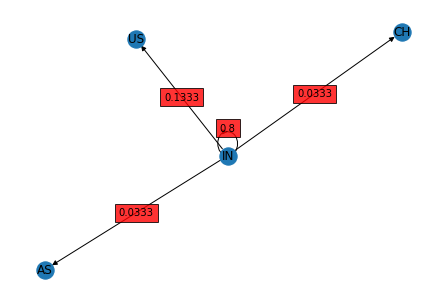

In [10]:
from analysis.markov import MarkovProcessorFactory
from analysis.markov import MarkovObject

mo = MarkovObject()
mo.fit(analysis_df)

mpf = MarkovProcessorFactory(mo)
mpf.create_grapher().graph("IN")

# Joining Data

In [5]:
import pandas as pd
import os

iso_cc_path = os.path.join(os.getcwd(), '..', 'data', 'iso_cc.csv')
human_dev_path = os.path.join(os.getcwd(), '..', 'data', 'human_dev_index.csv')
ds_salaries_processed_path = os.path.join(os.getcwd(), '..', 'data', 'ds_salaries_processed.csv')

iso_cc_df = pd.read_csv(iso_cc_path)
human_dev_df = pd.read_csv(human_dev_path)
ds_salaries_processed_df = pd.read_csv(ds_salaries_processed_path)

In [2]:
iso_cc_df

,Country Name,Code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS
...,...,...
243,Wallis and Futuna,WF
244,Western Sahara [ah],EH
245,Yemen,YE
246,Zambia,ZM


In [3]:
human_dev_df

,country,humanDevelopmentIndex,pop2022
0,Tuvalu,0.000,12.066
1,Somalia,0.000,16841.795
2,Niger,0.354,26083.660
3,Central African Republic,0.367,5016.678
4,South Sudan,0.388,11618.511
...,...,...,...
185,Germany,0.936,83883.596
186,Ireland,0.938,5020.199
187,Australia,0.939,26068.792
188,Switzerland,0.944,8773.637


In [6]:
new_df = iso_cc_df.merge(human_dev_df, how='left', left_on='Country Name', right_on='country')
new_df['pop2022'] = new_df['pop2022'] * 1000

In [7]:
new_df.to_csv('iso_cc_with_human_dev_and_pop.csv', index=False)